[*********************100%***********************]  1 of 1 completed


C:\Users\Facilimpa\AppData\Local\Programs\Python\Python310\lib\site-packages\trend_classifier\segmentation.py:109: UserWarning: No dataframe provided, column argument will be ignored.
  warnings.warn("No dataframe provided, column argument will be ignored.")
C:\Users\Facilimpa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Facilimpa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Facilimpa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


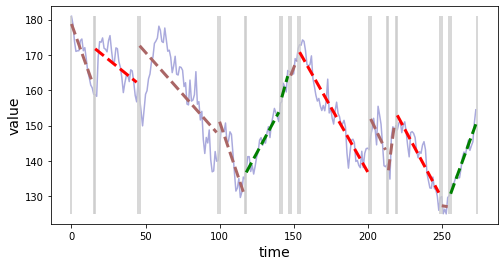

In [3]:
import yfinance as yf
from trend_classifier import Segmenter

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

# download data from yahoo finance
df = yf.download("AAPL")

df = df["2022":]

x_in = list(range(0, len(df.index.tolist()), 1))
y_in = df["Adj Close"].tolist()

seg = Segmenter(x_in, y_in, n=20)
seg.calculate_segments()

seg.plot_segments()

In [21]:
offset_list = list()

for segmento in seg.segments:
    
    for offset in segmento.offsets:
        offset_list.append(offset)
        
        
slope_list = list()

for segmento in seg.segments:
    
    for slope in segmento.slopes:
        slope_list.append(slope)

In [11]:
seg.segments.to_dataframe()

,start,stop,slope,offset,slopes_std,offsets_std,std,span,reason_for_new_segment,slopes,offsets
0,0,15,-1.222917,179.011791,0.000000,0.000000,2.460833,49.0,slope,[0.6515229877672751],[154.4050731458161]
1,16,45,-0.335955,177.096103,0.037750,1.624915,4.662986,121.0,slope,"[-0.5860253126101373, -0.6615262368567918]","[185.63156218564595, 188.88139260657755]"
2,46,99,-0.486970,195.275718,0.742932,47.975571,8.398196,218.0,slope,"[1.0212519710225283, -0.43815377601107175, -0....","[110.10972171869489, 198.95855197763083, 234.5..."
3,100,117,-1.153726,266.030211,0.000000,0.000000,3.914858,95.0,slope,[0.8552409121864721],[34.92305450439452]
4,118,141,0.791616,43.229989,0.000000,0.000000,2.103443,55.0,offset,[0.8931927788526492],[29.89802760074014]
5,142,147,1.471512,-50.906764,0.000000,0.000000,1.785287,33.0,offset,[0.3411682932000413],[115.34962375038548]
6,148,153,1.395685,-42.833017,0.000000,0.000000,1.233629,19.0,slope,[-0.862073809401431],[303.3746129315595]
7,154,201,-0.719257,281.287944,0.166590,28.348023,3.636564,99.0,offset,"[-1.027528817313053, -0.5444056116548698, -0.6...","[331.90653272356195, 250.1424903468083, 266.31..."
8,202,213,-1.003751,355.085643,0.000000,0.000000,4.390681,91.0,slope,[0.4500251253744705],[46.79897411604595]
9,214,219,2.735999,-447.467208,0.000000,0.000000,3.253790,64.0,offset,[-0.3491049745029012],[226.0096700109021]


In [74]:
import pandas as pd
import yfinance as yf

data = yf.download("PETR3.SA")

data = data["2018":]

filtered_data = data[['Close']]
filtered_data.columns = ['close_price']

filtered_data.index = pd.to_datetime(filtered_data.index)
#filtered_data.index = filtered_data.sort_index()


[*********************100%***********************]  1 of 1 completed


In [80]:
import pytrendseries

downtrend = "downtrend"
uptrend = "uptrend"
window = 120

downtrends_detected, down_statistcs = pytrendseries.detecttrend(filtered_data, trend=downtrend, window=window)
uptrends_detected, up_statistcs = pytrendseries.detecttrend(filtered_data, trend=uptrend, window=window)

100%|███████████████████████████████████████████████████████████████████████████| 1144/1144 [00:00<00:00, 14618.26it/s]


Trends detected in 5.87 secs


100%|███████████████████████████████████████████████████████████████████████████| 1144/1144 [00:00<00:00, 18522.62it/s]


Trends detected in 5.67 secs


In [76]:
downtrends_detected

,from,to,price0,price1,index_from,index_to,time_span,drawdown
6,2018-02-01 00:00:00-02:00,2018-02-09 00:00:00-02:00,22.13000,20.09000,22,28,6,0.09218
17,2018-03-09 00:00:00-03:00,2018-03-19 00:00:00-03:00,24.00000,22.59000,46,52,6,0.05875
23,2018-03-26 00:00:00-03:00,2018-04-04 00:00:00-03:00,23.91000,22.72000,57,63,6,0.04977
36,2018-05-16 00:00:00-03:00,2018-06-18 00:00:00-03:00,31.63000,17.21000,92,114,22,0.45590
66,2018-08-06 00:00:00-03:00,2018-08-21 00:00:00-03:00,23.30000,20.65000,148,159,11,0.11373
89,2018-10-16 00:00:00-03:00,2018-10-24 00:00:00-03:00,29.80000,28.32000,197,203,6,0.04966
96,2018-11-05 00:00:00-02:00,2018-12-20 00:00:00-02:00,30.65000,24.16000,210,241,31,0.21175
130,2019-02-21 00:00:00-03:00,2019-03-08 00:00:00-03:00,31.43000,29.00000,281,290,9,0.07731
137,2019-03-20 00:00:00-03:00,2019-08-16 00:00:00-03:00,32.97000,26.38000,298,401,103,0.19988
201,2019-09-16 00:00:00-03:00,2019-10-08 00:00:00-03:00,31.00000,28.22000,422,438,16,0.08968


In [77]:
uptrends_detected

,from,to,price0,price1,index_from,index_to,time_span,run_up
1,2018-01-02 00:00:00-02:00,2018-05-16 00:00:00-03:00,17.33000,31.63000,0,92,92,0.82516
57,2018-06-18 00:00:00-03:00,2018-11-05 00:00:00-02:00,17.21000,30.65000,114,210,96,0.78094
114,2018-11-23 00:00:00-02:00,2018-12-03 00:00:00-02:00,26.69000,28.93000,222,228,6,0.08393
132,2019-01-16 00:00:00-02:00,2019-01-24 00:00:00-02:00,28.54000,29.46000,256,262,6,0.03224
138,2019-01-29 00:00:00-02:00,2019-02-05 00:00:00-02:00,29.04000,30.55000,264,269,5,0.05200
165,2019-04-15 00:00:00-03:00,2019-04-23 00:00:00-03:00,29.11000,31.12000,316,321,5,0.06905
174,2019-05-17 00:00:00-03:00,2019-06-21 00:00:00-03:00,27.56000,31.79000,338,362,24,0.15348
190,2019-07-02 00:00:00-03:00,2019-07-12 00:00:00-03:00,29.47000,31.50000,369,376,7,0.06888
204,2019-08-16 00:00:00-03:00,2019-11-07 00:00:00-03:00,26.38000,33.45000,401,460,59,0.26801
247,2019-12-03 00:00:00-03:00,2020-01-06 00:00:00-03:00,31.07000,33.03000,476,496,20,0.06308


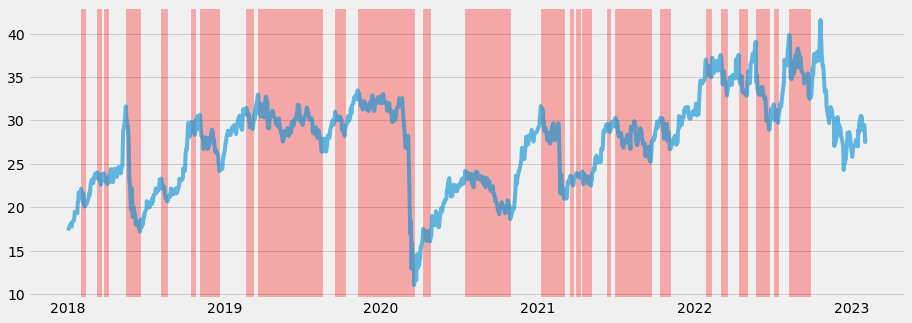

Plotted in 0.22 secs


In [78]:
pytrendseries.vizplot.plot_trend(filtered_data, downtrends_detected, downtrend)

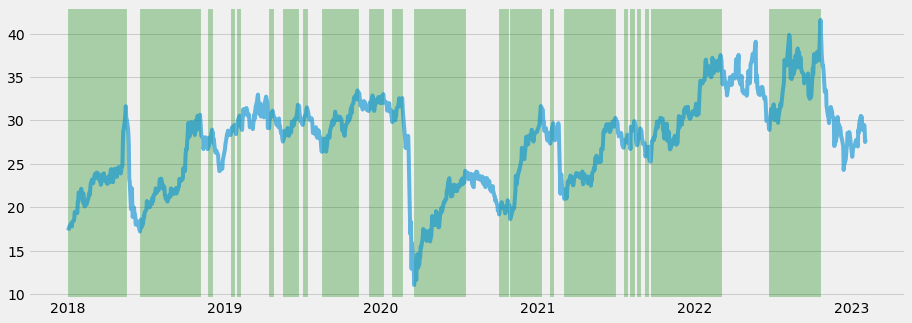

Plotted in 0.24 secs


In [79]:
pytrendseries.vizplot.plot_trend(filtered_data, uptrends_detected, uptrend)

In [99]:
from Pandas_Market_Predictor import Pandas_Market_Predictor
import pandas as pd
import yfinance as yf

import ta as ta
from ta import add_all_ta_features
from ta.utils import dropna


df = yf.download("PETR3.SA")

df = df["2018":]

resultados_roc = ta.momentum.ROCIndicator(df["Close"],12,False)
resultados_roc_sem_null = resultados_roc.roc().dropna()


resultados_tsi = ta.momentum.TSIIndicator(df["Close"],25,13,False)
resultados_tsi_sem_null = resultados_tsi.tsi().dropna()

df["Indicator1"]=resultados_roc_sem_null
df["Indicator2"]=resultados_tsi_sem_null
df.dropna(inplace=True)
# Create predictor
  


[*********************100%***********************]  1 of 1 completed


In [102]:
MyMarketPredictor = Pandas_Market_Predictor(df)

# Predict Trend
Indicators = ["Indicator1","Indicator2"]
TREND = MyMarketPredictor.Trend_Detection(Indicators,10)

# 10 is the percentage of standard Deviation to detect
#print(MyMarketPredictor.PERCENT_STD) # Print the value of standard deviation percentage

#Printing the result
print("Buy Trend :",TREND['BUY'])
print("Sell Trend :",TREND['SELL'])

Buy Trend : 0
Sell Trend : 1


In [106]:
Level = MyMarketPredictor.Support_Resistance_Estimation_Tool(Indicators)
print("Support Level :",Level['Support'])
print("Resistance Level :",Level['Resistance'])

Support Level : 27.397994152889233
Resistance Level : 28.29927058896563


In [107]:
# Determine at witch price your setup is invalide ?

# Risk Reward Ratio 1 / 3 mean i need to won 1 trade over 3 for being profitable
  
RISK_REWARD_RATIO = 1 / 3

# Stop Loss Calculation Exemple for Up & Down Trend

Stop_Loss_Up = MyMarketPredictor.STOP_LOSS_CALCULATOR("UP",Level['Support'],Level['Resistance'],RISK_REWARD_RATIO ) # For Up Trend
Stop_Loss_Down = MyMarketPredictor.STOP_LOSS_CALCULATOR("DOWN",Level['Support'],Level['Resistance'],RISK_REWARD_RATIO ) # For Up Down

# Printing Result

print("The Stop Loss Level for up Trend is", Stop_Loss_Up , "for",RISK_REWARD_RATIO ,"RISK_REWARD_RATIO" )
print("The Stop Loss Level for down Trend is", Stop_Loss_Down , "for",RISK_REWARD_RATIO ,"RISK_REWARD_RATIO" )

The Stop Loss Level for up Trend is 27.0975686741971 for 0.3333333333333333 RISK_REWARD_RATIO
The Stop Loss Level for down Trend is 28.599696067657764 for 0.3333333333333333 RISK_REWARD_RATIO


In [108]:
#Determine at witch price to exit ?

Trade_Efficiency_Factor = 1 - RISK_REWARD_RATIO
Take_Profit_Up = MyMarketPredictor.Take_Profit_CALCULATOR("UP",Level['Support'],Level['Resistance'],Trade_Efficiency_Factor)
Take_Profit_Down = MyMarketPredictor.Take_Profit_CALCULATOR("UP",Level['Support'],Level['Resistance'],Trade_Efficiency_Factor)
print("The Take Profit Level for up Trend is", Take_Profit_Up , "for",Trade_Efficiency_Factor ,"Trade_Efficiency_Factor" )
print("The Take Profit Level for down Trend is", Take_Profit_Down , "for",Trade_Efficiency_Factor ,"Trade_Efficiency_Factor" )

The Take Profit Level for up Trend is 27.998845110273496 for 0.6666666666666667 Trade_Efficiency_Factor
The Take Profit Level for down Trend is 27.998845110273496 for 0.6666666666666667 Trade_Efficiency_Factor
